# Support Vector Machine for Classification

In this notebook we discuss the Support Vector Machine (SVM) for Classification problem. As usual, we start giving the theoretical background and studying the model in details, on order to use it for a practical problem in the Mini-Challenge we proposed in the last section. The structure of the notebook is then:

- [Theoretical Analysis](#s1)
    - [Algorithm](#s1.1)
    
- [Implementation in Python](#s2)
- [Mini-challenge](#s3)

##  <a class="anchor" id='s1'>Theoretical Analysis</a> 

In machine learning, __Support-Vector Machines (SVM)__ are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. More formally, a support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class, the __margin__, since in general the larger the margin, the lower the generalization error of the classifier. We can divide the SVM algorithm in __linear__ and __non-linear__. In the linear case, the main assumption is that the points are linearly separable and a hyperplane can be found to divide the various classes. Nevertheless inside the linear case we can find two different subclasses that they differ each other by the fact that the points they are separable or they overlap somehow. 
The non-linear case is a generalization of the linear case where the points in the $d$-dimensional vector space are not linearly separable at all and therefore this space of feature is mapped into a higher dimensional space by means of a set of basis funcitons. In this new high dimensional space the points are linearly separable and the techniques of SVM linear model can be adapt. 

We are going here to describe the algorithm for the linear SVM for classification.

###  <a class="anchor" id='s1.1'>Algorithm</a> 

Our training dataset consists of $N$ pairs $(x_i,y_i)$ with $x_i\in\mathbb{R}^p$ and $y_i\in\{-1,1\}$. An affine hyperplane is defined as

\begin{align*}
\{x:\quad f(x)=x^T\beta+\beta_0=0\}
\end{align*}

where $\beta$ is a unit vector. The paramater $\beta_0$ determines the offset of the hyperplane from the origin along the normal vector $\beta$. A classification rule induced by $f(x)$ is 

\begin{align*}
G(x)=\text{sign}[x^T+\beta_0]
\end{align*}

If the classes are separable, we can find a function $f(x)=x^T\beta+\beta_0$ with $y_if(x_i)>0\,\,\forall i$. Hence we are able to find the hyperplane that creates the biggest __margin__ between the training points for class 1 and -1. The geometry of the hyperplane is

<div>
<img width=300 src='images/svm1.png' /> 
</div>

The optimization problem capturing the idea described and depicted in the picture above reads

\begin{align*}
\max_{\beta,\beta_0}\, M
\end{align*}

subject to $y_i(x_i^T\beta+\beta_0)\ge M$, $i=1,\cdots,N$. This problem can be rephrased as

\begin{align*}
\min_{\beta,\beta_0}\, ||\beta||, \quad\text{subject to}\, y_i(x_i^T\beta+\beta_0)\ge 1
\end{align*}

where $M=\frac{1}{||\beta||}$. This is a convex optimization problem.  An important consequence of this geometric description is that the max-margin hyperplane is completely determined by those points $x_i$ that lie nearest to it. These $x_i$ are called __support vectors__.


Suppose now that the classes overlap in the feature space. One way to deal with the overlap is to still maximize the margin $M$, but allow for some points to be on the wrong side of the margin. Define the slack variables $\xi=(\xi_1,\cdots,\xi_N)$. There are two natural way to modify the constraints defined before

\begin{align*}
y_i(x_i^T\beta+\beta_0)&\ge M-\xi_i\\
&\text{or}\\
y_i(x_i^T\beta+\beta_0)&\ge M(1-\xi_i)
\end{align*}

subject to $\xi_i\ge 0$ and $\sum_{i=1}^N\xi_i\le \text{constant}$. The two choices lead to different solution. The first choice seems more natural, since it measures overlap in actual distance from the margin; the second choice measures the overlap in relative distance, which changes with the width of the margin $M$. However, the first choice results in a non convex optimization problem, while the second is convex; this the second contraints leads to the standard support vector classifier. 

Here is the idea of the formulation. The value $\xi_i$ in the constraint $y_i(x_i^T\beta+\beta_0)\ge M(1-\xi_i)$ is the proportional amount by which the prediction $f(x_i)=x_i^T\beta+\beta_0$ is the wrong side of the margin. Hence, bounding the sum $\sum_{i=1}^N\xi_i$, we bound the total proportional amount by which the predictions fall on the wrong side of ther margin. Misclassifications occur when $\xi_i>1$, so bounding $\sum_{i=1}^N\xi_i$ at a value $K$ say, bounds the total number of training misclassifications at $K$. 

We can then write the optimization problem as

\begin{align*}
\min ||\beta||\quad\text{subject to}\, \begin{cases}
     &y_i(x_i^T\beta+\beta_0)\ge 1-\xi_i\,\, \forall i,\\
     &\xi_i\ge 0,\,\sum\xi_i\le K
  \end{cases}
\end{align*}

This is the usual way the support vector classifier is defined for the non-separable case. The image below illustrates the overlapping case

<div>
<img width=300 src='images/svm2.png' /> 
</div>

In order to solve the convex minimization problem above we re-express the equations in the equivalent form

\begin{align*}
&\min_{\beta,\beta_0}\frac{1}{2}||\beta||^2+C\sum_{i=1}^N\xi_i\\
&\text{subject to}\,\,\xi_i\ge 0,\,y_i(x_i^T\beta+\beta_0)\ge 1-\xi_i,\,\forall i
\end{align*}

where the _cost_ parameter $C$ replaces the constant $K$; the separable case is recovered by setting $C=\infty$. The Lagrangian primal function is 

\begin{align*}
L_P=\frac{1}{2}||\beta||^2+C\sum_{i=1}^N\xi_i-\sum_{i=1}^N\alpha_i[y_i(x_i^T\beta+\beta_0)-(1-\xi_i)]-\sum_{i=1}^N\mu_i\xi_i
\end{align*}

which we minimize with respect to $\beta,\beta_0$ and $\xi_i$. Setting the respective derivatives to zero, we get 

\begin{align*}
\beta&=\sum_{i=i}^N\alpha_iy_ix_i\\
0&=\sum_{i=i}^N\alpha_iy_i\\
\alpha_i&=C-\mu_i,\,\forall i
\end{align*}

as well as the positivity constraints $\alpha_i,\mu_i,\xi_i\ge 0,\,\forall i$. By substituting those three equations into $L_P$ we obtain the Lagrangian dual objective function

\begin{align*}
L_D=\sum_{i=1}^N\alpha_i-\frac{1}{2}\sum_{i=1}^N\sum_{i'=1}^N\alpha_i\alpha_{i'}y_iy_{i'}x_i^Tx_{i'}
\end{align*}

which gives a lower bound on the objective function for any feasible point. We maximize $L_D$ subject to $0\le\alpha_i\le C$ and $\sum_{i=1}^N\alpha_iy_i=0$. In addition to conditions written above the Karuch-Kuhn-Tucker conditions include the contraints

\begin{align*}
\alpha_i[y_i(x_i^T\beta+\beta_0)-(1-\xi_i)]&=0\\
\mu_i\xi_i&=0\\
y_i(x_i^T\beta+\beta_0)-(1-\xi_i)&\ge 0
\end{align*}

Together all these equations fix the solution to be

\begin{align*}
\hat{\beta}=\sum_{i=1}^N\hat{\alpha}_iy_ix_i
\end{align*}

with $\hat{\alpha}_i$ nonzero only for those observations $i$ for which the constraint $y_i(x_i^T\beta+\beta_0)-(1-\xi_i)\ge 0$ are exactly met, due to $\alpha_i[y_i(x_i^T\beta+\beta_0)-(1-\xi_i)]=0$. These observations, as we already anticipated, are called __support vectors__, since $\hat{\beta}$ is represented in terms of them alone. Among these support points, some will lie on the edge of the margin ($\hat{\xi}_i=0$), and hence from $\mu_i\xi_i=0$ and $\alpha_i=C-\mu_i$ will be characterized by $0<\hat{\alpha}_i<C$; the remainder ($\hat{\xi}_i=0$) have $\hat{alpha}_i=C$. These margin points can be used to find $\beta_0$ thanks to $\alpha_i[y_i(x_i^T\beta+\beta_0)-(1-\xi_i)]=0$.

Given the solution $\hat{\beta}$ and $\hat{\beta}_0$, the decision function can be written as 

\begin{align*}
\hat{G}(x)=\text{sign}[\hat{f}(x)]=\text{sign}[x^T\hat{\beta}+\hat{\beta}_0]
\end{align*}

The tuning parameter of the algorithm is the cost parameter $C$.

The optimization problems we just solved is equivalent to the following problem

\begin{align*}
\min_{\beta,\beta_0}\sum_{i=1}^N[1-y_if(x_i)]_++\frac{\lambda}{2}||\beta||^2
\end{align*}

where $L(y,f)=[1-yf]_+$ is the Hinge loss function and it takes the positive part of the argument. So basically we translate the problem to a empirical risk minimization problem with the hinge loss. It can be shown that the solution of this problem is the same as the one found above, with $\lambda=1/C$.

The support vector classifier described so far finds linear boundaries in the input feature space. As with other linear models, we can make the procedure more flexible by enlarging the feature space using basis expansions. Generally linear boundaries in the enlarged space achieve better training-class separation, and tranlsate to non-linear boundaries in the original space. Once the basis functions $h_m(x),\,m=1,\cdots,M$ are selected, the procedure is the same as before. We fit the SVM classifier using input features $h(x_i)=(h_1(x_i),\cdots,h_M(x_i))$, for $i=1,\cdots,N$, and produce the non linear function $\hat{f}(x)=h^T(x)\hat{\beta}+\hat{\beta}_0$. The classifier is $\hat{G}(x)=\text{sign}\left(\hat{f}(x)\right)$. 

The Lagrange dual function reads

\begin{align*}
L_D=\sum_{i=1}^N\alpha_i-\frac{1}{2}\sum_{i=1}^N\sum_{i'=1}^N\alpha_i\alpha_{i'}y_iy_{i'}\langle h(x_i),h(x_{i'})\rangle
\end{align*}

and from the previous formulae we see that the solution function can be written 

\begin{align*}
f(x)&=h^T(x)\beta+\beta_0\\
&=\sum_{i=1}^N\alpha_iy_i\langle h(x),h(x_{i})\rangle+\beta_0
\end{align*}

As before, given $\alpha_i$, $\beta_0$ can be determined by solving $y_if(x_i)=1$ for any $x_i$ for which $0<\alpha_i<C$.

The equations written so far involve $h(x)$ only through inner products. In fact, we need not specify the transformation $h(x)$ at all, but require only knowledge of the kernel function

\begin{align*}
K(x,x')=\langle h(x),h(x')\rangle
\end{align*}

that computes inner products in the transformed space. Three popular choices for $K$ in the SVM literature are

\begin{align*}
K(x,x')&=(1+\langle x,x'\rangle)^d:\quad\text{dth-degree polynomial}\\
K(x,x')&=\exp(-\gamma||x-x'||^2):\quad\text{Radial basis}\\
K(x,x')&=\tanh(\kappa_1\langle x,x'\rangle+\kappa_2):\quad\text{Neural network}
\end{align*}

The general solution reads

\begin{align*}
\hat{f}(x)=\sum_{i=1}^N\hat{\alpha}_iy_iK(x,x_i)+\hat{\beta}_0
\end{align*}


##  <a class="anchor" id='s2'>Implementation in Python</a> 

The classes `LinearSVC` and `SVC` of the module `sklearn.svm` are:

`LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)`

and

`SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)`


Since it's a class is composed by __parameters__, __attributes__ and __method__. The official page where all the details can be found is [here](https://scikit-learn.org/stable/modules/svm.html)

##  <a class="anchor" id='s3'>Mini-challenge</a> 

We still study in this mini challenge the standard dasaset of Iris classification.  As in the previous cases we structure the section as follows:

- __Inizialization__
- __Exploration of Data__
- __Model Selection__
- __Model Assessment__
- __Interpretability__

### Inizialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler

import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots, get_dataset
from sklearn.utils.random import sample_without_replacement


import warnings
warnings.filterwarnings("ignore")

### Exploration of Data

In [2]:
df=pd.read_csv('data/heart.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
num_feat=['age', 'trestbps', 'chol', 'thalach','oldpeak']
cat_feat=['sex','fbs','exang','cp','restecg','slope','ca','thal','target']

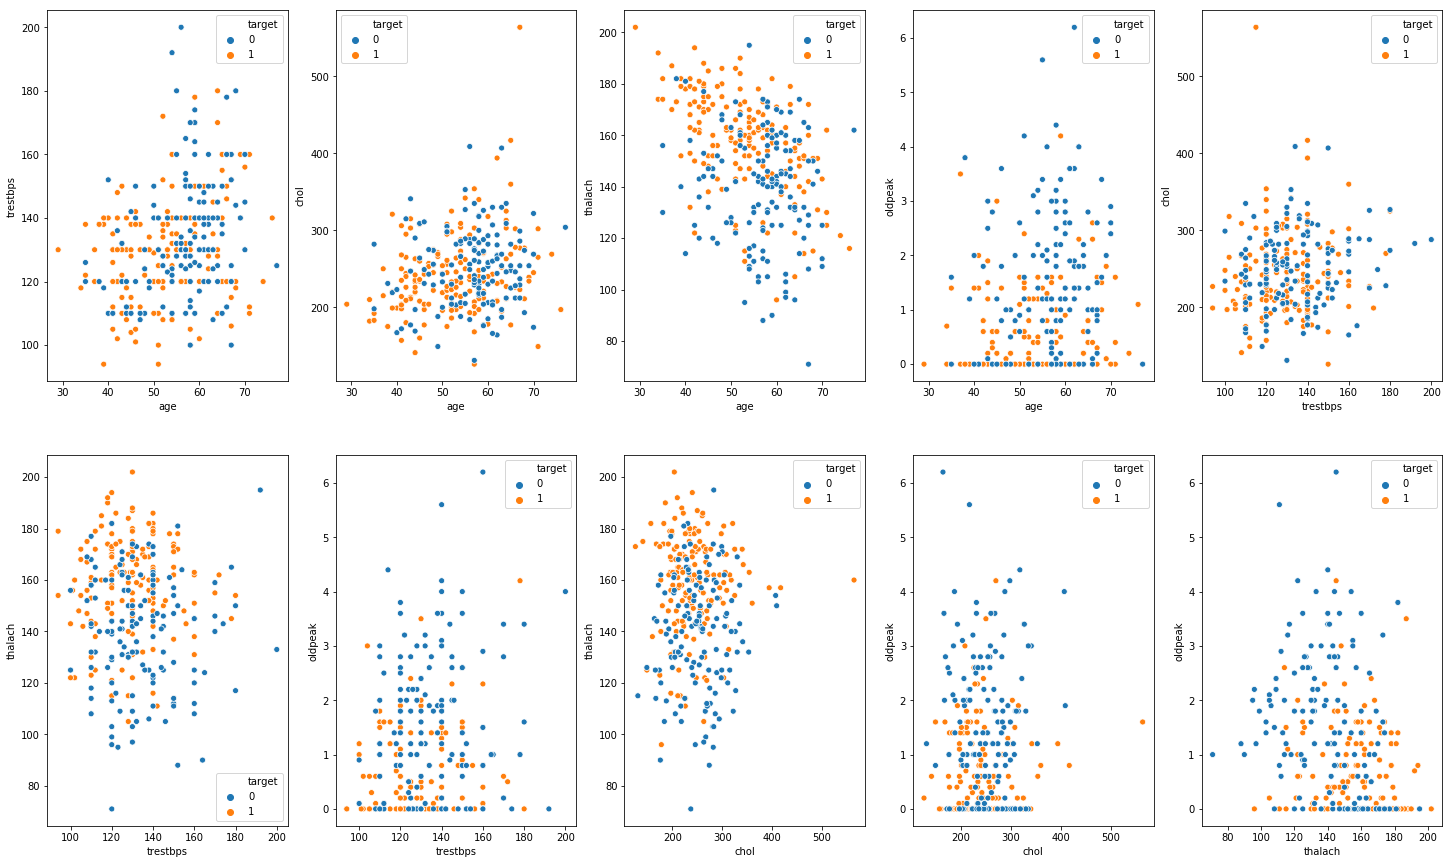

In [36]:
f1, axs = plt.subplots(2, 5, figsize=(25, 15), sharex=False, sharey=False)

f1 = sns.scatterplot(x=num_feat[0], y=num_feat[1], hue='target', data=df,ax=axs[0,0])
f1 = sns.scatterplot(x=num_feat[0], y=num_feat[2], hue='target', data=df,ax=axs[0,1])
f1 = sns.scatterplot(x=num_feat[0], y=num_feat[3], hue='target', data=df,ax=axs[0,2])
f1 = sns.scatterplot(x=num_feat[0], y=num_feat[4], hue='target', data=df,ax=axs[0,3])
f1 = sns.scatterplot(x=num_feat[1], y=num_feat[2], hue='target', data=df,ax=axs[0,4])

f1 = sns.scatterplot(x=num_feat[1], y=num_feat[3], hue='target', data=df,ax=axs[1,0])
f1 = sns.scatterplot(x=num_feat[1], y=num_feat[4], hue='target', data=df,ax=axs[1,1])
f1 = sns.scatterplot(x=num_feat[2], y=num_feat[3], hue='target', data=df,ax=axs[1,2])
f1 = sns.scatterplot(x=num_feat[2], y=num_feat[4], hue='target', data=df,ax=axs[1,3])
f1 = sns.scatterplot(x=num_feat[3], y=num_feat[4], hue='target', data=df,ax=axs[1,4])



### Model Selection

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target',axis=1), df.target, shuffle=True, train_size=0.8, random_state=42)

In [ ]:
model=SVC(C=2,kernel='poly')
model.fit(X_train,y_train)

sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True)

In [12]:
print('The accuracy of the SVC is',accuracy_score(y_test, model.predict(X_test)))

The accuracy of the SVC is 0.5245901639344263


In [9]:
model.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)>

In [ ]:
params={'C': np.arange(1,5,1), 'kernel': ['rbf','poly','sigmoid'] }

model=SVC(C=2)
clf=GridSearchCV(model, param_grid=params,refit=True)

clf.fit(df.drop('target',axis=1), df.target)

In [35]:
clf.best_params_

{'n_neighbors': 22, 'weights': 'uniform'}

In [36]:
clf.best_score_

0.834983498349835

In [37]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=22, p=2,
           weights='uniform')

### Model Assessment

In [40]:
def accur(rep):
    rkf= RepeatedKFold(n_splits=5, n_repeats=rep, random_state=True)
    acc=[]
    
    for train_I, test_I in rkf.split(df):
        X_fold_train = scaler.fit_transform(df.iloc[train_I, :].drop('target',axis=1))
        y_fold_train = df['target'].values[train_I]
        X_fold_test = scaler.fit_transform(df.iloc[test_I, :].drop('target',axis=1))
        y_fold_test = df['target'].values[test_I]
        model = clf.best_estimator_
        model.fit(X_fold_train, y_fold_train)
        acc.append(accuracy_score(y_fold_test, model.predict(X_fold_test)))
    print('The estimation of the accuracy score over the test distributions is:', "{:2.2f}%".format(np.mean(acc)*100), '\u00B1', np.std(acc))
    print("The confidence interval is [{:2.1f}%, {:2.1f}%]".format(*np.quantile(acc, q=[0.025, 0.975]) * 100))
    
    return acc

The estimation of the accuracy score over the test distributions is: 82.03% ± 0.04756914216783455
The confidence interval is [72.1%, 90.2%]


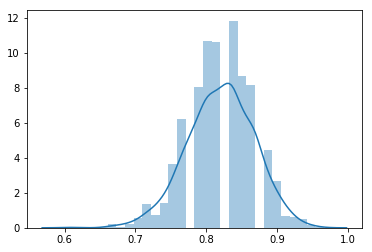

In [42]:
sns.distplot(accur(500),bins=30)